# Exploration of cluster 511, layer 21, activation threshold 1.5, 100 batch graph gen, 5000 cap PCA

In [40]:
%load_ext autoreload
%autoreload 2
import logging
import os
import re
from os.path import join as pj

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import scipy.sparse as sparse
import torch

from sae_cooccurrence.normalised_cooc_functions import (
    create_results_dir,
    neat_sae_id,
)
from sae_cooccurrence.pca import (
    generate_subgraph_plot_data_sparse,
    plot_subgraph_static_from_nx,
    plot_token_pca_and_save,
)
from sae_cooccurrence.streamlit import load_streamlit_config, load_subgraph_data
from sae_cooccurrence.utils.saving_loading import load_npz_files
from sae_cooccurrence.utils.set_paths import get_git_root

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Setup

In [10]:
git_root = get_git_root()
torch.set_grad_enabled(False)

In [11]:
config = load_streamlit_config(
    pj(git_root, "src", "config_pca_streamlit_maxexamples.toml")
)

In [12]:
fs_splitting_cluster = 511
save_figs = True
subgraph_id = fs_splitting_cluster
layer = 21
activation_threshold = 1.5
activation_threshold_safe = str(activation_threshold).replace(".", "_")
batch_size = 100
pca_cap = 5000
model_name = "gemma-2-2b"
sae_release_short = "gemma-scope-2b-pt-res-canonical"
sae_id = "layer_21/width_16k/canonical"
sae_id_neat = neat_sae_id(sae_id)
n_batches_reconstruction = 100
graph_size = 5
n_batches_generation = 100

In [16]:
results_dir = create_results_dir(
    model_name, sae_release_short, sae_id_neat, n_batches=n_batches_generation
)
results_path = pj(git_root, results_dir)
activation_threshold_safe = str(activation_threshold).replace(".", "_")

In [17]:
file_path = pj(
    get_git_root(),
    results_dir,
    f"layer_{layer}_width_16k_canonical_pca_for_streamlit",
    f"{pca_cap}cap_graph_analysis_results_size_{graph_size}_nbatch_{n_batches_reconstruction}.h5",
)

In [18]:
node_df = pd.read_csv(
    pj(results_path, f"dataframes/node_info_df_{activation_threshold_safe}.csv")
)
logging.info(
    f"Loaded node_df from {pj(results_path, f'dataframes/node_info_df_{activation_threshold_safe}.csv')}"
)

overall_feature_activations = load_npz_files(
    results_path, "feature_acts_cooc_activations"
).get(activation_threshold)

# with open(pj(results_path, f"subgraph_objects/activation_{activation_threshold_safe}/subgraph_{subgraph_id}.pkl"), 'rb') as f:
#     subgraph = pickle.load(f)


# Filter for the specific subgraph
fs_splitting_nodes = node_df.query("subgraph_id == @subgraph_id")["node_id"].tolist()

Loading npz files:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
pca_prefix = "pca"
figures_path = pj(git_root, f"figures/{model_name}/{sae_release_short}/{sae_id_neat}")
pca_dir = f"{pca_prefix}_{activation_threshold_safe}_subgraph_{subgraph_id}"
pca_path = pj(figures_path, pca_dir)
if not os.path.exists(pca_path):
    os.makedirs(pca_path)

In [20]:
results, pca_df = load_subgraph_data(
    file_path, subgraph_id, config["processing"]["load_options"]
)

In [21]:
# device = set_device()
# model = HookedTransformer.from_pretrained(model_name, device=device)
# sae_release = get_sae_release(model_name, sae_release_short)
# sae, cfg_dict, sparsity = SAE.from_pretrained(
#     release=sae_release, sae_id=sae_id, device=device
# )
# sae.fold_W_dec_norm()
# activation_store = ActivationsStore.from_sae(
#     model=model,
#     sae=sae,
#     streaming=True,
#     store_batch_size_prompts=8,
#     train_batch_size_tokens=4096,
#     n_batches_in_buffer=4,
#     device=device,
# )

Using MPS


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [12]:
# custom_prompts = [
#     "The First Circuit continued by pointing out that",
#     "The Second Circuit continued by pointing out that",
#     "The Third Circuit continued by pointing out that",
#     "The Fourth Circuit continued by pointing out that",
#     "The Fifth Circuit continued by pointing out that",
#     "The Sixth Circuit continued by pointing out that",
#     "The Seventh Circuit continued by pointing out that",
#     "The Eighth Circuit continued by pointing out that",
#     "The Ninth Circuit continued by pointing out that",
#     "The Tenth Circuit continued by pointing out that",
#     "He is my first nephew",
#     "He is my second nephew",
#     "He is my third nephew",
#     "He is my fourth nephew",
#     "He is my fifth nephew",
#     "He is my sixth nephew",
#     "He is my seventh nephew",
#     "He is my eighth nephew",
#     "He is my ninth nephew",
#     "He is my tenth nephew",
#     "Handbook of Optics, First Edition",
#     "Handbook of Optics, Second Edition",
#     "Handbook of Optics, Third Edition",
#     "Handbook of Optics, Fourth Edition",
#     "Handbook of Optics, Fifth Edition",
#     "Handbook of Optics, Sixth Edition",
#     "Handbook of Optics, Seventh Edition",
#     "Handbook of Optics, Eighth Edition",
#     "Handbook of Optics, Ninth Edition",
#     "Handbook of Optics, Tenth Edition",
# ]

In [30]:
# data = generate_data(
#     model,
#     sae,
#     activation_store,
#     fs_splitting_nodes,
#     n_batches_reconstruction,
#     decoder=False,
#     remove_special_tokens=False,
#     device=device,
#     max_examples=5_000_000,
#     trim_excess=False,
#     custom_prompts=custom_prompts,
# )

# results_custom = data["results"]
# pca_df_custom = data["pca_df"]
# pca_custom = data["pca"]

Processing prompts:   0%|          | 0/3 [00:00<?, ?it/s]

Total examples found: 60


In [22]:
# # Save pca_df as CSV
# pca_df_filename = f"pca_df_subgraph_{subgraph_id}.csv"
# pca_df.to_csv(pj(pca_path, pca_df_filename), index=False)

plot_token_pca_and_save(pca_df, pca_path, subgraph_id, color_by="token", save=save_figs)

# plot_pca_explanation_and_save(pca, pca_path, subgraph_id, save=save_figs)

# plot_simple_scatter(results, pca_path, subgraph_id, fs_splitting_nodes, save=save_figs)

# if pca_decoder is not None:
#     pca_decoder, pca_decoder_df = calculate_pca_decoder(sae, fs_splitting_nodes)
#     # Save pca_decoder_df as CSV
#     pca_decoder_df_filename = f"pca_decoder_df_subgraph_{subgraph_id}.csv"
#     pca_decoder_df.to_csv(pj(pca_path, pca_decoder_df_filename), index=False)

#     create_pca_plots_decoder(pca_decoder_df, subgraph_id, pca_path, save=save_figs)

print(f"Processing completed for subgraph ID {subgraph_id}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Processing completed for subgraph ID 511


In [50]:
def extract_ordinal_number_first_second_third(context: str) -> int | None:
    context = context.lower().replace("|", " ")

    # Simplified ordinal map for just first, second, third
    ordinal_map = {
        "first": 1,
        "second": 2,
        "third": 3,
        "1st": 1,
        "2nd": 2,
        "3rd": 3,
    }

    for word, value in ordinal_map.items():
        if word in context:
            return value
    return None


def extract_ordinal_number(context):
    context = context.lower().replace("|", " ")

    # Dictionary for written ordinals
    ordinal_map = {
        "first": 1,
        "second": 2,
        "third": 3,
        "fourth": 4,
        "fifth": 5,
        "sixth": 6,
        "seventh": 7,
        "eighth": 8,
        "ninth": 9,
        "tenth": 10,
        "1st": 1,
        "2nd": 2,
        "3rd": 3,
        "4th": 4,
        "5th": 5,
        "6th": 6,
        "7th": 7,
        "8th": 8,
        "9th": 9,
        "10th": 10,
    }

    # Look for any ordinal form in the text
    for word, value in ordinal_map.items():
        if word in context:
            return value

    # Look for numeric ordinals (1st, 2nd, etc.)
    numeric_ordinal = re.search(r"\b(\d+)(?:st|nd|rd|th)\b", context)
    if numeric_ordinal:
        return int(numeric_ordinal.group(1))

    # Look for plain numbers followed by "of"
    number_of = re.search(r"\b(\d+)\s+of\b", context)
    if number_of:
        return int(number_of.group(1))

    return None

In [23]:
def plot_pca_numbers_before_of(pca_df, pca_path, fs_splitting_cluster, save_figs=False):
    # Clean context and extract numbers
    pca_df["cleaned_context"] = pca_df["context"].str.replace("<|endoftext|>", "")
    pca_df["ordinal_number"] = pca_df["cleaned_context"].apply(extract_ordinal_number)

    # Create figure
    plt.figure(figsize=(12, 8))

    # Create custom colormap (from cool to warm colors)
    colors = plt.cm.viridis  # type: ignore

    # Plot background points (no ordinal number)
    non_number_mask = pca_df["ordinal_number"].isna()
    plt.scatter(
        pca_df.loc[non_number_mask, "PC2"],
        pca_df.loc[non_number_mask, "PC3"],
        color="lightgrey",
        alpha=0.1,
        s=50,
        label="No ordinal number",
    )

    # Plot points with ordinal numbers using color gradient
    number_mask = ~pca_df["ordinal_number"].isna()
    if number_mask.any():
        scatter = plt.scatter(
            pca_df.loc[number_mask, "PC2"],
            pca_df.loc[number_mask, "PC3"],
            c=pca_df.loc[number_mask, "ordinal_number"],
            cmap=colors,
            alpha=0.6,
            s=50,
        )
        plt.colorbar(scatter, label="Ordinal Number")

    plt.title("PCA Analysis - Ordinal Numbers")
    plt.xlabel("PC2")
    plt.ylabel("PC3")
    plt.tight_layout()

    if save_figs:
        plt.savefig(
            f"{pca_path}/pca_plot_ordinal_numbers_static_{fs_splitting_cluster}.png",
            dpi=300,
            bbox_inches="tight",
        )

    plt.show()
    plt.close()

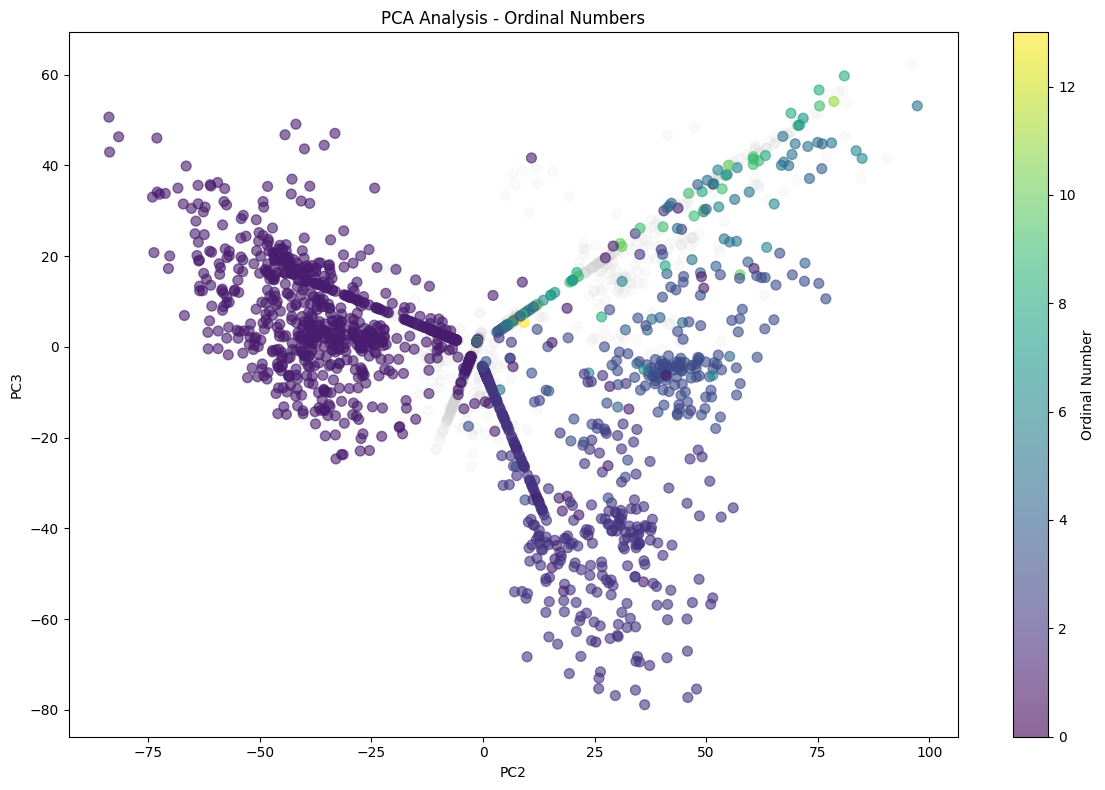

In [24]:
plot_pca_numbers_before_of(pca_df, pca_path, fs_splitting_cluster, save_figs)

In [51]:
def plot_pca_numbers_before_of_plotly(
    pca_df: pd.DataFrame,
    pca_path: str,
    fs_splitting_cluster: int,
    save_figs: bool = False,
) -> None:
    # Clean context and extract numbers (reusing existing logic)
    pca_df["cleaned_context"] = pca_df["context"].str.replace("<|endoftext|>", "")
    pca_df["ordinal_number"] = pca_df["cleaned_context"].apply(extract_ordinal_number)

    # Create figure
    fig = go.Figure()

    # Plot background points (no ordinal number)
    non_number_mask = pca_df["ordinal_number"].isna()
    fig.add_trace(
        go.Scatter(
            x=pca_df.loc[non_number_mask, "PC2"],
            y=pca_df.loc[non_number_mask, "PC3"],
            mode="markers",
            marker=dict(color="lightgrey", opacity=0.1),
            name="No ordinal number",
            hovertemplate="PC2: %{x}<br>PC3: %{y}<br>Context: %{text}<extra></extra>",
            text=pca_df.loc[non_number_mask, "cleaned_context"],
        )
    )

    # Plot points with ordinal numbers using discrete colors
    number_mask = ~pca_df["ordinal_number"].isna()
    if number_mask.any():
        # Create discrete color map
        unique_ordinals = sorted(pca_df.loc[number_mask, "ordinal_number"].unique())  # type: ignore
        colors = px.colors.qualitative.Set1[: len(unique_ordinals)]  # type: ignore

        for ordinal, color in zip(unique_ordinals, colors):
            ordinal_mask = pca_df["ordinal_number"] == ordinal
            fig.add_trace(
                go.Scatter(
                    x=pca_df.loc[ordinal_mask, "PC2"],
                    y=pca_df.loc[ordinal_mask, "PC3"],
                    mode="markers",
                    marker=dict(color=color, opacity=0.6),
                    name=f"Ordinal {int(ordinal)}",
                    hovertemplate=(
                        "PC2: %{x}<br>PC3: %{y}<br>"
                        "Ordinal: "
                        f"{int(ordinal)}<br>"
                        "Context: %{text}<extra></extra>"
                    ),
                    text=pca_df.loc[ordinal_mask, "cleaned_context"],
                )
            )

    # Update layout
    fig.update_layout(
        title="PCA Analysis - Ordinal Numbers",
        xaxis_title="PC2",
        yaxis_title="PC3",
        showlegend=True,
        width=1000,
        height=800,
    )

    if save_figs:
        fig.write_html(
            f"{pca_path}/pca_plot_ordinal_numbers_interactive_{fs_splitting_cluster}.html"
        )
        fig.write_image(
            f"{pca_path}/pca_plot_ordinal_numbers_static_{fs_splitting_cluster}.png",
            width=1000,
            height=800,
        )

    fig.show()

In [52]:
plot_pca_numbers_before_of_plotly(pca_df, pca_path, fs_splitting_cluster, save_figs)

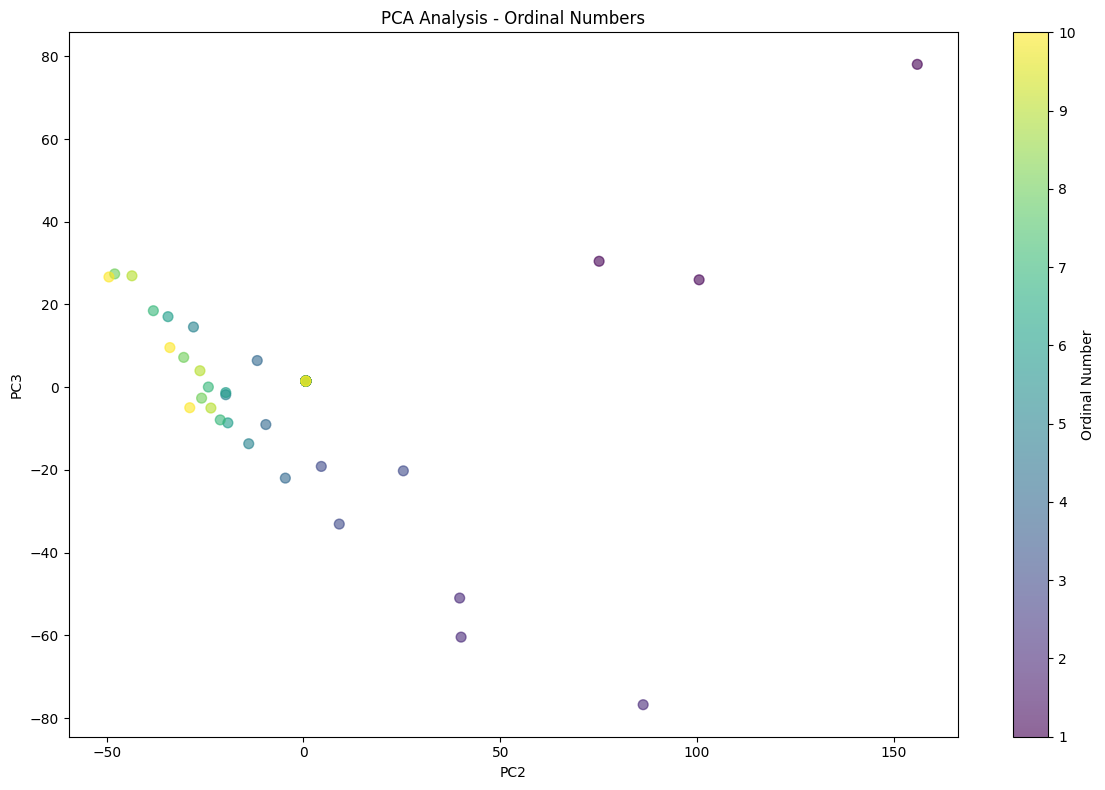

In [31]:
# plot_pca_numbers_before_of(pca_df_custom, pca_path, fs_splitting_cluster, save_figs)

In [37]:
def plot_pca_numbers_first_second_third(
    pca_df: pd.DataFrame,
    pca_path: str,
    fs_splitting_cluster: int,
    save_figs: bool = False,
) -> None:
    def extract_ordinal_number_first_second_third(context: str) -> int | None:
        context = context.lower().replace("|", " ")

        # Simplified ordinal map for just first, second, third
        ordinal_map = {
            "first": 1,
            "second": 2,
            "third": 3,
            "1st": 1,
            "2nd": 2,
            "3rd": 3,
        }

        for word, value in ordinal_map.items():
            if word in context:
                return value
        return None

    # Clean context and extract numbers
    pca_df["cleaned_context"] = pca_df["context"].str.replace("<|endoftext|>", "")
    pca_df["ordinal_number_first_second_third"] = pca_df["cleaned_context"].apply(
        extract_ordinal_number_first_second_third
    )

    # Set up colors for each ordinal
    colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # blue, orange, green
    labels = ["First", "Second", "Third"]

    plt.figure(figsize=(12, 8))

    # Plot background points
    non_number_mask = pca_df["ordinal_number"].isna()
    plt.scatter(
        pca_df.loc[non_number_mask, "PC2"],
        pca_df.loc[non_number_mask, "PC3"],
        color="lightgrey",
        alpha=0.1,
        s=50,
        label="Other tokens",
    )

    # Plot each ordinal number with its own color
    for i, (color, label) in enumerate(zip(colors, labels), start=1):
        mask = pca_df["ordinal_number_first_second_third"] == i
        plt.scatter(
            pca_df.loc[mask, "PC2"],
            pca_df.loc[mask, "PC3"],
            color=color,
            alpha=0.6,
            s=50,
            label=label,
        )

    plt.title("PCA Analysis - First, Second, Third")
    plt.xlabel("PC2")
    plt.ylabel("PC3")
    plt.legend()
    plt.tight_layout()

    if save_figs:
        plt.savefig(
            f"{pca_path}/pca_plot_first_second_third_{fs_splitting_cluster}.png",
            dpi=300,
            bbox_inches="tight",
        )

    plt.show()
    plt.close()

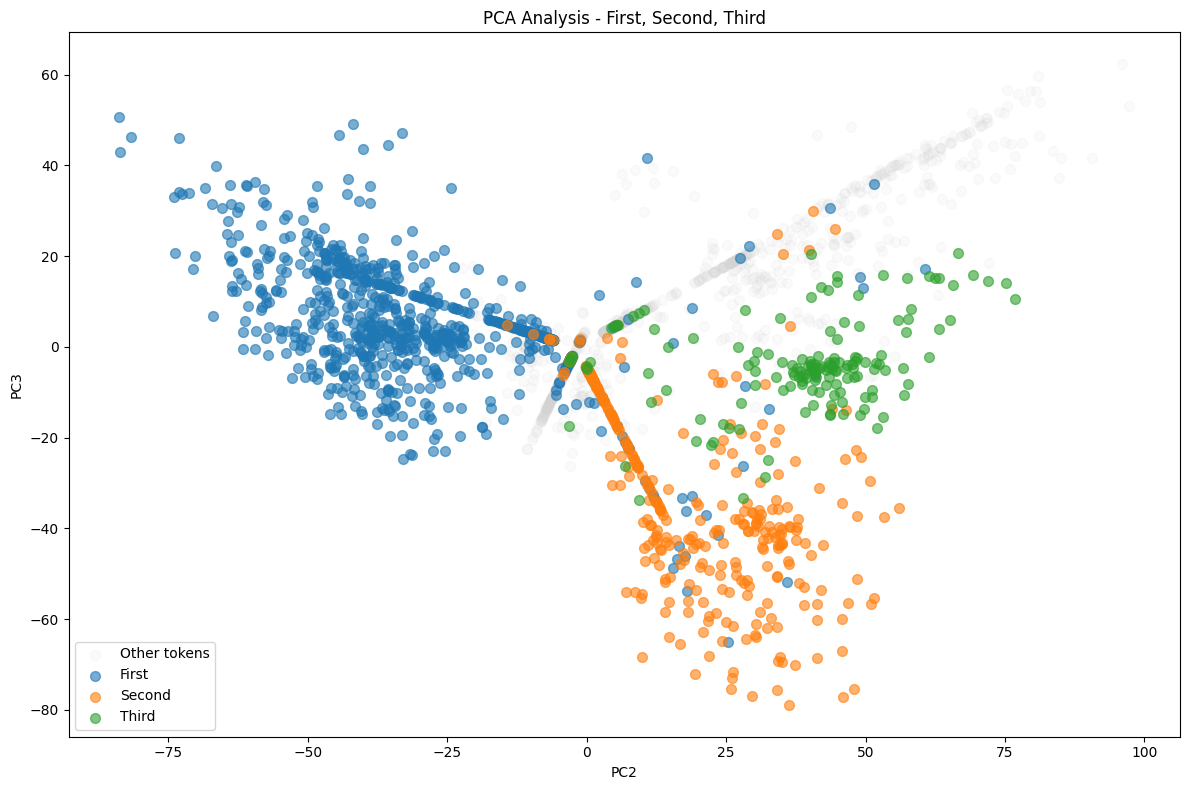

In [38]:
plot_pca_numbers_first_second_third(pca_df, pca_path, fs_splitting_cluster, save_figs)

In [51]:
feature_activations = pd.DataFrame(
    results["all_graph_feature_acts"],
    columns=[f"Feature {i}" for i in fs_splitting_nodes],
)

In [34]:
# feature_activations_custom = pd.DataFrame(
#     results_custom.all_graph_feature_acts.cpu().numpy(),
#     columns=[f"Feature {i}" for i in fs_splitting_nodes],
# )

In [38]:
def plot_ordinal_vs_activation_boxplot_per_feature(
    pca_df: pd.DataFrame,
    feature_activations: pd.DataFrame,
    pca_path: str,
    fs_splitting_cluster: int,
    save_figs: bool = False,
) -> None:
    # Filter for rows with ordinal numbers
    df_with_ordinals = pca_df[pca_df["ordinal_number"].notna()].copy()

    # Create a subplot for each feature
    n_features = feature_activations.shape[1]
    # Changed subplot arrangement to n_features rows and 1 column
    fig, axes = plt.subplots(n_features, 1, figsize=(8, 5 * n_features))

    for idx, (feature_name, ax) in enumerate(zip(feature_activations.columns, axes)):
        # Get feature activations for this specific feature
        feature_data = [
            feature_activations.loc[
                df_with_ordinals[df_with_ordinals["ordinal_number"] == i].index,
                feature_name,
            ]
            for i in sorted(df_with_ordinals["ordinal_number"].unique())
        ]

        # Create boxplot
        ax.boxplot(
            feature_data,
            labels=[
                f"#{int(i)}"
                for i in sorted(df_with_ordinals["ordinal_number"].unique())
            ],
        )

        ax.set_title(f"{feature_name}")
        ax.set_xlabel("Ordinal Number")
        ax.set_ylabel("Activation Strength")
        ax.grid(True, alpha=0.3)

    plt.tight_layout()

    if save_figs:
        plt.savefig(
            f"{pca_path}/activation_by_ordinal_boxplot_per_feature_{fs_splitting_cluster}.png",
            dpi=300,
            bbox_inches="tight",
        )

    plt.show()
    plt.close()

/var/folders/gj/gtktc0xd6vd23yfx6f6gp_lm0000gn/T/ipykernel_13100/2758026647.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/gj/gtktc0xd6vd23yfx6f6gp_lm0000gn/T/ipykernel_13100/2758026647.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/gj/gtktc0xd6vd23yfx6f6gp_lm0000gn/T/ipykernel_13100/2758026647.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/gj/gtktc0xd6vd23yfx6f6gp_lm0000gn/T/ipykernel_13100/2758026647.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; 

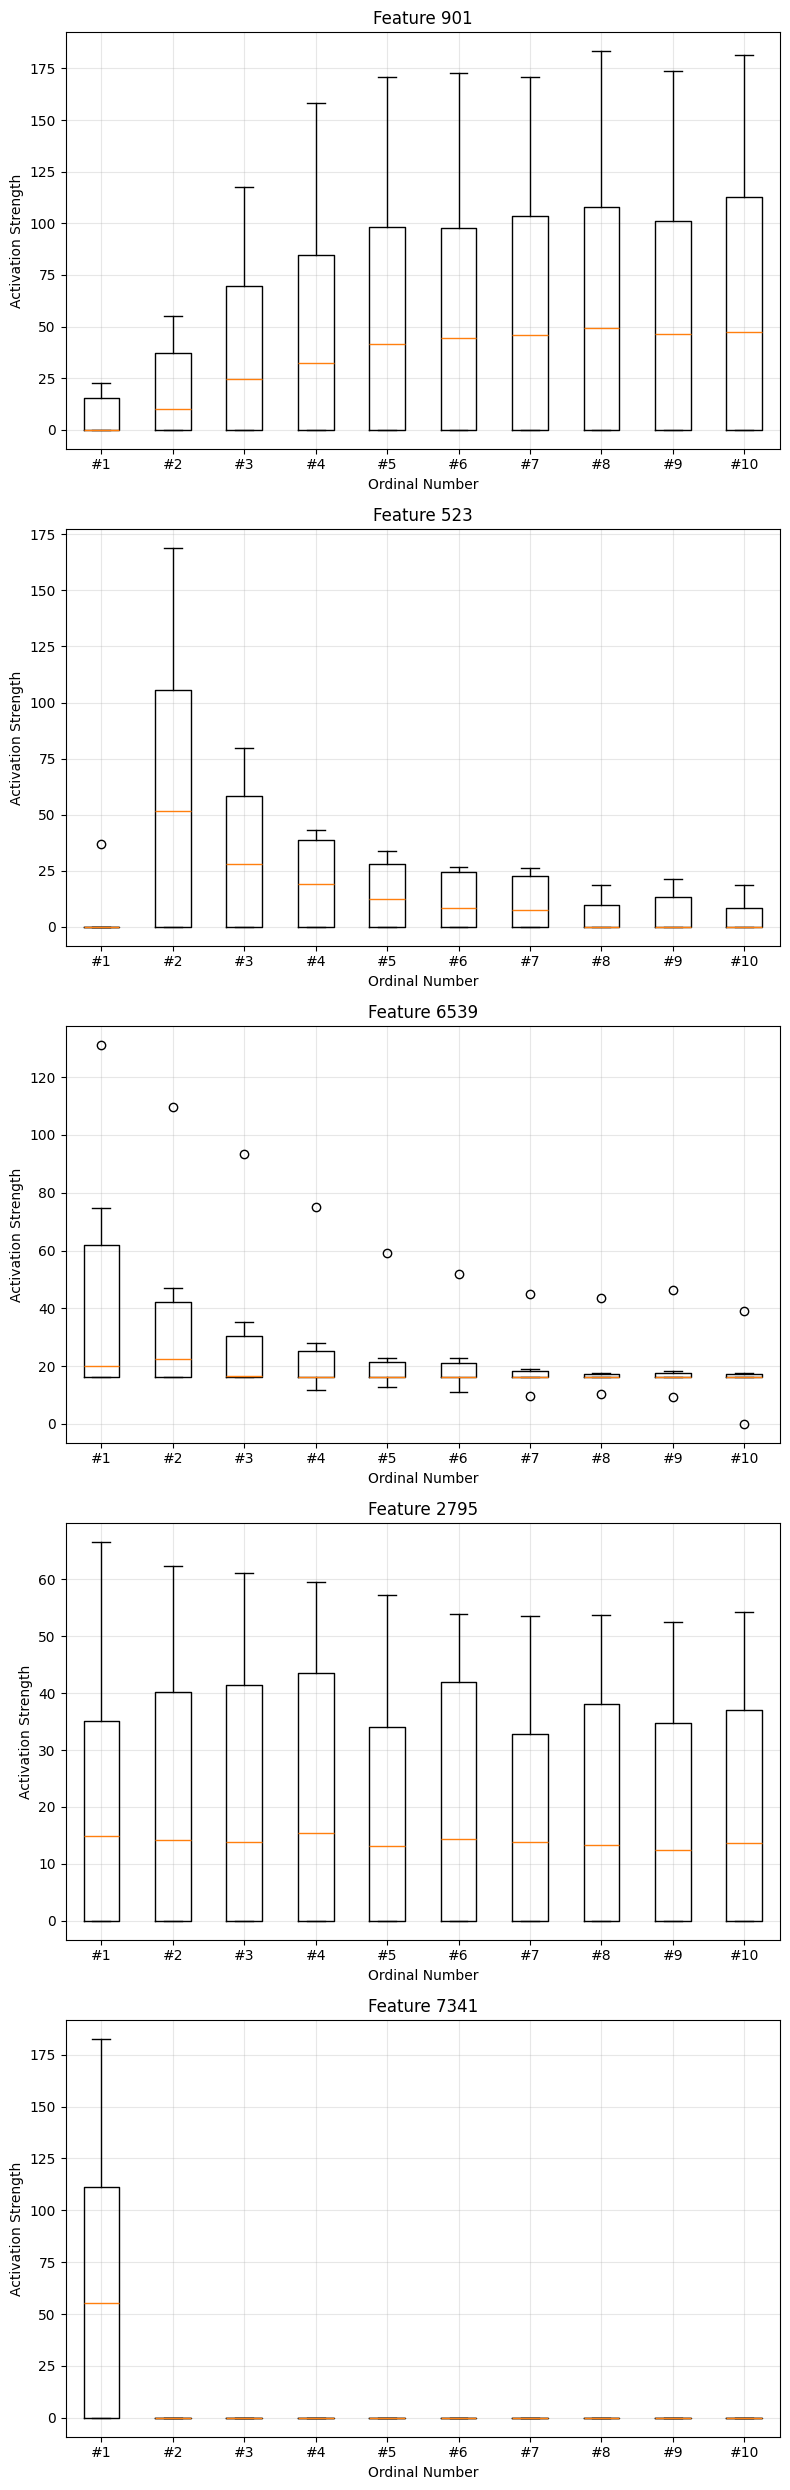

In [39]:
# plot_ordinal_vs_activation_boxplot_per_feature(
#     pca_df_custom,
#     feature_activations_custom,
#     pca_path,
#     fs_splitting_cluster,
#     save_figs,
# )

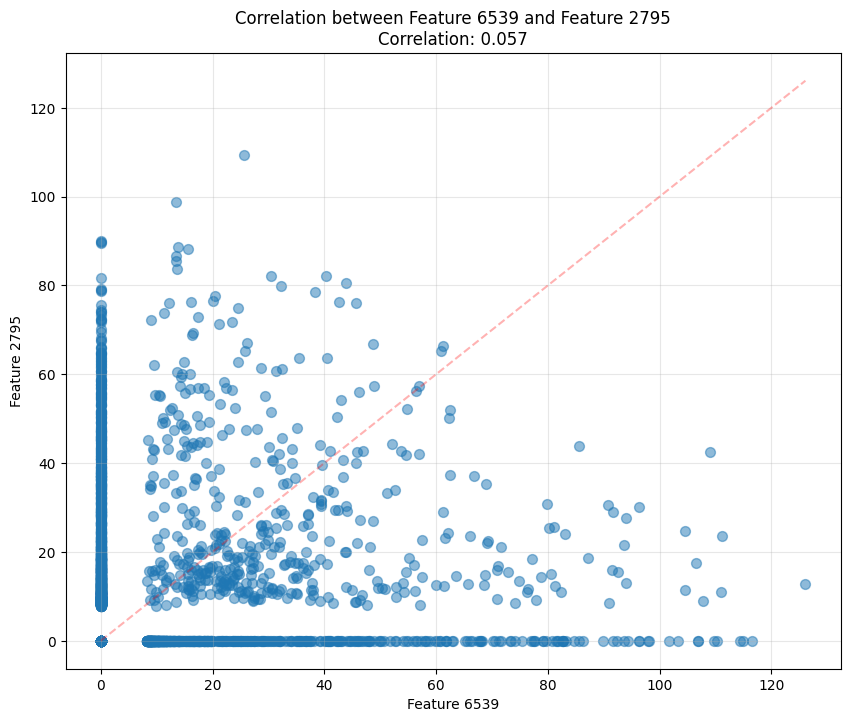

In [60]:
def plot_feature_correlation(
    feature_activations: pd.DataFrame,
    feature1: str,
    feature2: str,
    pca_path: str,
    fs_splitting_cluster: int,
    save_figs: bool = False,
) -> None:
    plt.figure(figsize=(10, 8))

    # Create scatter plot
    plt.scatter(
        feature_activations[feature1],
        feature_activations[feature2],
        alpha=0.5,
        s=50,
    )

    # Add correlation coefficient
    corr = feature_activations[feature1].corr(feature_activations[feature2])
    plt.title(f"Correlation between {feature1} and {feature2}\nCorrelation: {corr:.3f}")

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.grid(True, alpha=0.3)

    # Add diagonal line for reference
    max_val = max(
        feature_activations[feature1].max(),
        feature_activations[feature2].max(),
    )
    plt.plot([0, max_val], [0, max_val], "r--", alpha=0.3)

    if save_figs:
        plt.savefig(
            f"{pca_path}/feature_correlation_{fs_splitting_cluster}.png",
            dpi=300,
            bbox_inches="tight",
        )

    plt.show()
    plt.close()


# Call the function to plot correlation between features 6539 and 2795
plot_feature_correlation(
    feature_activations,
    "Feature 6539",
    "Feature 2795",
    pca_path,
    fs_splitting_cluster,
    save_figs,
)

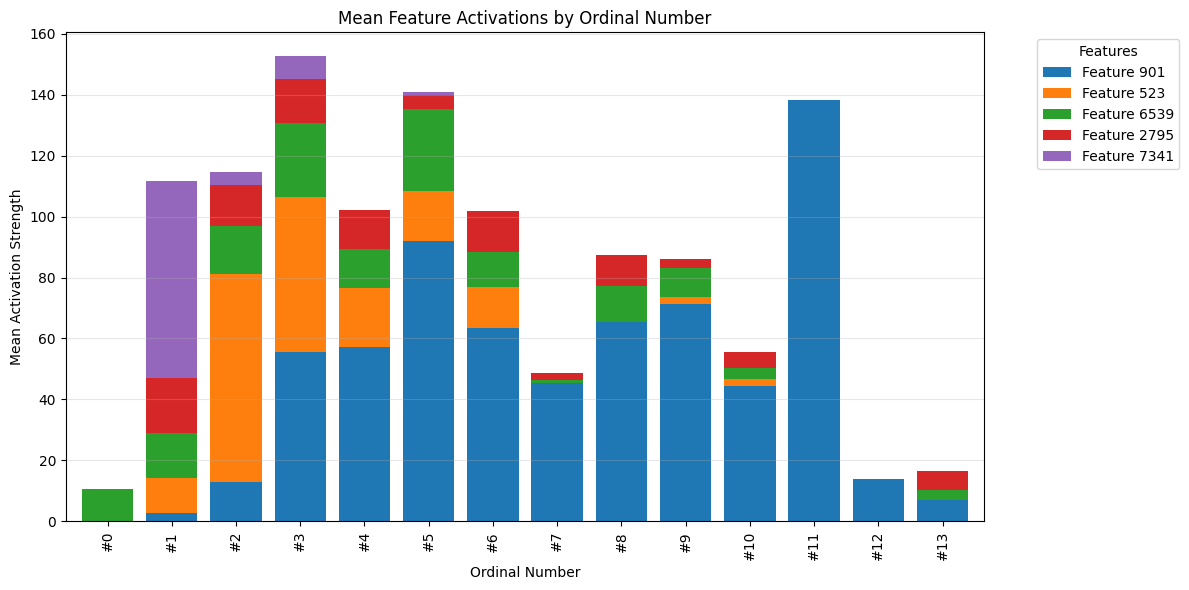

In [34]:
def plot_ordinal_mean_activations_stacked(
    pca_df: pd.DataFrame,
    feature_activations_array: np.ndarray,
    pca_path: str,
    fs_splitting_cluster: int,
    save_figs: bool = False,
) -> None:
    # Convert numpy array to DataFrame
    feature_activations = pd.DataFrame(
        feature_activations_array,
        columns=[f"Feature {i}" for i in fs_splitting_nodes],
    )

    # Filter for rows with ordinal numbers
    df_with_ordinals = pca_df[pca_df["ordinal_number"].notna()].copy()

    # Calculate mean activation for each feature per ordinal number
    mean_activations = []
    for ordinal in sorted(df_with_ordinals["ordinal_number"].unique()):
        indices = df_with_ordinals[df_with_ordinals["ordinal_number"] == ordinal].index
        means = feature_activations.loc[indices].mean()
        mean_activations.append(means)

    # Convert to DataFrame for easier plotting
    mean_df = pd.DataFrame(
        mean_activations,
        index=[
            f"#{int(i)}" for i in sorted(df_with_ordinals["ordinal_number"].unique())
        ],
    )

    # Create stacked bar chart
    _ = mean_df.plot(
        kind="bar",
        stacked=True,
        figsize=(12, 6),
        width=0.8,
    )

    plt.title("Mean Feature Activations by Ordinal Number")
    plt.xlabel("Ordinal Number")
    plt.ylabel("Mean Activation Strength")
    plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3, axis="y")
    plt.tight_layout()

    if save_figs:
        plt.savefig(
            f"{pca_path}/mean_activations_stacked_{fs_splitting_cluster}.png",
            dpi=300,
            bbox_inches="tight",
        )

    plt.show()
    plt.close()


# Call the function with your data
plot_ordinal_mean_activations_stacked(
    pca_df,
    results["all_graph_feature_acts"],
    pca_path,
    fs_splitting_cluster,
    save_figs,
)

In [37]:
def plot_ordinal_mean_activations_stacked_normalized(
    pca_df: pd.DataFrame,
    feature_activations_array: np.ndarray,
    pca_path: str,
    fs_splitting_cluster: int,
    save_figs: bool = False,
) -> None:
    # Convert numpy array to DataFrame
    feature_activations = pd.DataFrame(
        feature_activations_array,
        columns=[f"Feature {i}" for i in fs_splitting_nodes],
    )

    # Filter for rows with ordinal numbers
    df_with_ordinals = pca_df[pca_df["ordinal_number"].notna()].copy()

    # Calculate mean activation for each feature per ordinal number
    mean_activations = []
    for ordinal in sorted(df_with_ordinals["ordinal_number"].unique()):
        indices = df_with_ordinals[df_with_ordinals["ordinal_number"] == ordinal].index
        means = feature_activations.loc[indices].mean()
        mean_activations.append(means)

    # Convert to DataFrame for easier plotting
    mean_df = pd.DataFrame(
        mean_activations,
        index=[
            f"#{int(i)}" for i in sorted(df_with_ordinals["ordinal_number"].unique())
        ],
    )

    # Normalize each row so they sum to 1
    normalized_df = mean_df.div(mean_df.sum(axis=1), axis=0)

    # Create stacked bar chart with normalized values
    _ = normalized_df.plot(
        kind="bar",
        stacked=True,
        figsize=(12, 6),
        width=0.8,
    )

    plt.title("Relative Feature Activations by Ordinal Number")
    plt.xlabel("Ordinal Number")
    plt.ylabel("Relative Activation Proportion")
    plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3, axis="y")
    plt.tight_layout()

    # # Add text showing total activation before normalization
    # for i, total in enumerate(mean_df.sum(axis=1)):
    #     plt.text(
    #         i,
    #         1.02,
    #         f"Total: {total:.2f}",
    #         ha="center",
    #         va="bottom",
    #         rotation=0,
    #     )

    if save_figs:
        plt.savefig(
            f"{pca_path}/mean_activations_stacked_normalized_{fs_splitting_cluster}.png",
            dpi=300,
            bbox_inches="tight",
        )

    plt.show()
    plt.close()

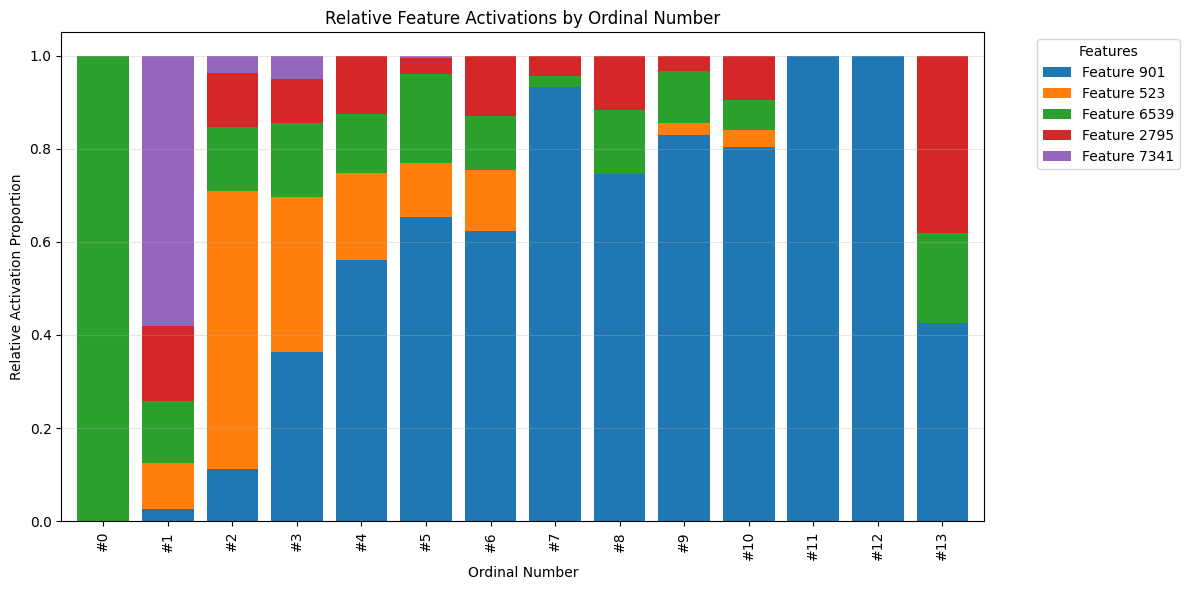

In [38]:
plot_ordinal_mean_activations_stacked_normalized(
    pca_df,
    results["all_graph_feature_acts"],
    pca_path,
    fs_splitting_cluster,
    save_figs,
)

In [41]:
subgraph_id = fs_splitting_cluster
sparse_thresholded_matrix = sparse.load_npz(
    os.path.join(
        results_path, "thresholded_matrices", "sparse_thresholded_matrix_1_5.npz"
    ),
)
subgraph, subgraph_df = generate_subgraph_plot_data_sparse(
    sparse_thresholded_matrix=sparse_thresholded_matrix,
    node_df=node_df,
    subgraph_id=subgraph_id,
)
plot_subgraph_static_from_nx(
    subgraph=subgraph,
    output_path=pj(pca_path, "subgraph_static"),
    subgraph_df=subgraph_df,
    node_info_df=node_df,
    save_figs=True,
    show_plot=True,
)

/Users/matthew/Documents/Github/sae_cooccurrence/sae_cooccurrence/pca.py:3209: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

